In [1]:
import random
import numpy as np
import pandas as pd
import time
import json
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import AveragePooling1D
from keras.layers.embeddings import Embedding
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [65]:
dt = pd.read_csv('investments.csv')
dt = dt[['company_name', 'investor_name']]
for i, row in dt.iterrows():
    if not isinstance(row['company_name'], str) or not isinstance(row['investor_name'], str):
        print(i, 'company:{}'.format(row['company_name']), 'investor:{}'.format(row['investor_name'])


30061 company:Citelighter investor:nan
47437 company:Enevo investor:nan
58626 company:Robin investor:nan
63275 company:HappyFresh investor:nan
86112 company:Mapme investor:nan
109520 company:PFITR, LLC investor:nan
117872 company:Questra investor:nan
124119 company:RoomCentral investor:nan
138344 company:Springleap investor:nan
145081 company:nan investor:Portland Seed Fund
151108 company:TRITTY Inc. investor:nan
160796 company:Wealthminder investor:nan
164343 company:Xiaomi investor:nan


In [66]:
dt = dt.dropna()
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168634 entries, 0 to 168646
Data columns (total 2 columns):
company_name     168634 non-null object
investor_name    168634 non-null object
dtypes: object(2)
memory usage: 3.9+ MB


In [32]:
all_companies = set()
all_investors = set()
company_investor_dict = {}
investor_company_dict = {}

t1 = time.time()
for i, row in dt.iterrows():
    company = row['company_name']
    investor = row['investor_name']
    
    if company not in all_companies:
        company_investor_dict[company] = set()
        company_investor_dict[company].add(investor)
    else:
        company_investor_dict[company].add(investor)
        
    if investor not in all_investors:
        investor_company_dict[investor] = set()
        investor_company_dict[investor].add(company)
    else:
        investor_company_dict[investor].add(company)
    
    all_companies.add(company)
    all_investors.add(investor)
#     if i % 1000 == 0:
#         print(i)
#     if i == 5000:
#         break
t2 = time.time()
print(t2-t1)

20.660111904144287


In [33]:
# select the investors who invested more than 4 startups
investor_portfolio_size = sorted(
    [(k, len(v)) for k, v in investor_company_dict.items() if len(v) >= 5], 
    reverse=True, key=lambda x: x[1])

len(investor_portfolio_size)

4572

In [34]:
selected_investors = set([x[0] for x in investor_portfolio_size])

selected_investor_company_dict = {}
for i in selected_investors:
    selected_investor_company_dict[i] = investor_company_dict[i]

In [35]:
selected_companies = set()
for i in selected_investors:
    companies = selected_investor_company_dict[i]
    for c in companies:
        selected_companies.add(c)

selected_companies_id_dict = {}
for i, c in enumerate(selected_companies):
    selected_companies_id_dict[c] = i
        
len(selected_companies)
# selected_companies_id_dict

37832

In [39]:
def create_id_dict(x):
#create a fixed id dictionary
    id_dict = {}
    id_dict_inverse = {}
#     for item in x:
#         if not isinstance(x, str):
#             print(x)
    x = sorted(list(x))
    for i, k in enumerate(x):
        id_dict[k] = i
        id_dict_inverse[i] = k
    return id_dict, id_dict_inverse

In [40]:
list(selected_investor_company_dict)

['Angels Den',
 'Wasserstein Ventures',
 'Ulster Bank Diageo Venture Fund',
 'Lazarus Israel Opportunities Fund',
 'David Lee',
 'Rivers Capital Partners',
 'AxVentures-Pymar Fund',
 'Jay Batson',
 'Ares Capital Corporation',
 'Flint Capital',
 'Logan Capital AG',
 'Adage Capital Management',
 'American Capital',
 'Steve Huffman',
 'Persistence Partners',
 'Eric Kagan',
 'Kevin Hale',
 'Shotput Ventures',
 'Integra Ventures',
 'Highway 12 Ventures',
 'Celtic House Venture Partners',
 'Fondo de Inversión Privado Copec-UC',
 'David Rose',
 'John Battelle',
 'Venky Harinarayan',
 'Sorenson Capital',
 'Longworth Venture Partners',
 'Energy Technology Ventures',
 'Telegraph Hill Partners',
 'Nebraska Innovation Fund: Prototype Fund (Grant)',
 'Horizon Ventures',
 'Oxford Technology Management',
 'Alliance Technology Ventures',
 'Revolution LLC',
 'Chris Sacca',
 'PacRim Venture Partners',
 'Khosla Ventures',
 'Varsity Ventures',
 'Mountain Group Capital',
 'Opus Capital',
 'PMV-Vinnof',
 'B

In [41]:
selected_investors_id_dict, selected_investors_id_dict_inverse = create_id_dict(selected_investor_company_dict)
selected_companies_id_dict, selected_companies_id_dict_inverse = create_id_dict(selected_companies)   

In [43]:
# selected_investors_id_dict

In [44]:
integer_encoded_labels = list(selected_investors_id_dict.values())

d = array(integer_encoded_labels)
print(d)
# one hot encode
labels = to_categorical(d)
print(labels)
# # invert encoding
# inverted = argmax(labels)
# print(inverted)

[   0    1    2 ... 4569 4570 4571]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [45]:
# selected_investor_company_dict

In [46]:
portfolios = list(selected_investor_company_dict.values())
list(portfolios[0])

['Delete',
 'Ambassador Uni',
 'Flavourly',
 'Bar Pass',
 'Fliplet',
 'MuscleGenes',
 'Vrai Mobile Limited',
 'Miappi',
 'Baptie & Company',
 'Sesame Labs',
 'Fuel Station',
 'ReChannel',
 'Close Communications',
 '2mee',
 'RetailerSaver.com',
 'Empiribox',
 'Freeflow Technologies',
 'Port Saffron',
 'New Soda',
 'Better Schools Project',
 'Lowdownapp Ltd',
 'Open Goaaal Trading',
 'BSixGroup',
 'Newsflare',
 'BoxMan',
 'North Sea Recovery',
 'Constant Commerce',
 'EnergyDeck',
 'NY Slice',
 'Business Agent',
 'Chop Chop',
 'Night Zookeeper',
 'SourceTV',
 'Green Sea Guard',
 'Kloodle',
 'Cut A Long Story',
 'Bondoo Baby',
 'Antaco',
 'Intelligent Positioning',
 'Berry White',
 'Beer52',
 'Kallikids',
 'Perfect World',
 'Nutrifiz',
 'Advanced LEDs',
 'Van Bulck Beers',
 'Clear Returns',
 'Gingersnap',
 'Exaget',
 'SupaPass']

In [47]:
# integer encode the investors' portfolios
vocab_size = len(selected_companies)
encoded_portfolios = []
for i in portfolios:
    c_list = list(i)
    encoded_c_list = []
    for c in c_list:
        encoded_c_list.append(selected_companies_id_dict[c])
    
    encoded_portfolios.append(encoded_c_list)    

encoded_portfolios

[[8668,
  1765,
  11488,
  3459,
  11543,
  20273,
  34266,
  19387,
  3456,
  27838,
  11979,
  25665,
  6754,
  124,
  26215,
  10068,
  11885,
  24225,
  21091,
  3783,
  18042,
  22215,
  3294,
  21151,
  4627,
  21459,
  7437,
  10181,
  20546,
  5022,
  6299,
  21282,
  29269,
  13139,
  16633,
  8149,
  4494,
  2015,
  15405,
  3746,
  3630,
  16227,
  23381,
  21674,
  1111,
  33390,
  6586,
  12659,
  10673,
  30273],
 [23368, 28330, 15002, 7645, 6275],
 [768, 28326, 4875, 19396, 11184, 11190, 29914, 13224, 13902],
 [35764, 2261, 9179, 24241, 6518],
 [6291,
  21993,
  17230,
  16612,
  9184,
  28371,
  30576,
  16025,
  26324,
  16768,
  29662,
  26120],
 [19746, 24153, 25760, 235, 25744],
 [13060, 23841, 11597, 8083, 16331, 3994, 35836],
 [35794, 30533, 37427, 11023, 33921, 11100, 6169, 26375, 6074, 5664, 15845],
 [16967, 30356, 4721, 36227, 29182, 20322, 25965],
 [27055,
  34632,
  25047,
  19741,
  17332,
  2042,
  23935,
  1651,
  2277,
  5927,
  35653,
  8642,
  4828,
  2

In [48]:
# padding the portfolios
df = pd.DataFrame(data=investor_portfolio_size, columns=['name', 'number'])

maxlen = df['number'].max()

padded_portfolios = pad_sequences(encoded_portfolios, maxlen, padding='post')
padded_portfolios

array([[ 8668,  1765, 11488, ...,     0,     0,     0],
       [23368, 28330, 15002, ...,     0,     0,     0],
       [  768, 28326,  4875, ...,     0,     0,     0],
       ...,
       [13961, 27098, 19678, ...,     0,     0,     0],
       [14888, 21746, 37198, ...,     0,     0,     0],
       [18246, 25770, 17572, ...,     0,     0,     0]], dtype=int32)

In [49]:
maxlen

757

In [67]:
# load json and create model
json_file = open('model_1_gpu.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_1_gpu_weights.hdf5")
print("Loaded model from disk")
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# loaded_model.evaluate([dev_desc, dev_kw, norm_dev_data[:, :5]], dev_label, verbose=1)
# loaded_model.predict([dev_desc, dev_kw, norm_dev_data[:, :5]])

Loaded model from disk


In [68]:
investor_embed_mat = model.layers[5].get_weights()[0]
investor_embed_mat = investor_embed_mat.transpose()
# each row represents an investor
np.shape(investor_embed_mat)

(4572, 32)

In [70]:
n_rows = len(investor_embed_mat[:,0])
n_rows

4572

In [71]:
investor_embeddings_dict = {}
# investor_embeddings_dict_inverse = {}
for i in range(n_rows):
    investor_name = selected_investors_id_dict_inverse[i]
    investor_vector = investor_embed_mat[i,:]
    investor_embeddings_dict[investor_name] = investor_vector
    # investor_embeddings_dict_inverse[investor_vector] = investor_name

In [72]:
len(investor_embeddings_dict)

4572

In [73]:
investor_embed_mat[3]

array([ 0.85125834,  0.20423909, -0.8918592 , -0.3443929 ,  1.8447789 ,
       -0.37428752, -0.4849645 ,  1.1669266 , -2.2878718 , -0.24617295,
       -0.2061148 , -0.5914892 , -0.3782527 ,  0.40312326, -0.70724064,
       -0.7312529 ,  0.4057992 , -0.5784086 ,  0.93655634,  0.6654263 ,
       -0.59204173, -0.307793  ,  0.30994394,  1.2589182 ,  0.78557163,
       -0.34587583, -0.990723  ,  0.01262104,  0.74081737,  0.54508305,
       -0.32041448, -0.7628203 ], dtype=float32)

In [74]:
data = investor_embed_mat
num_clusters=1000
num_components=2

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data)
kmeans.labels_

array([485, 323, 861, ..., 842, 567, 815], dtype=int32)

In [75]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [76]:
cluster_2_indices = ClusterIndicesNumpy(2,kmeans.labels_)

In [77]:
cluster_2_investors = set()
cluster_2_portfolio_companies = set()
for i in cluster_2_indices:
    investor = selected_investors_id_dict_inverse[i]
    cluster_2_investors.add(investor)
    
    for c in selected_investor_company_dict[investor]:
        cluster_2_portfolio_companies.add(c)

In [78]:
def cluster_n_investors(clustNum, selected_investors_id_dict_inverse, selected_investor_company_dict):
    cluster_investors = set()
    cluster_portfolio_companies = set()
    cluster_indices = ClusterIndicesNumpy(clustNum,kmeans.labels_)
    for i in cluster_indices:
        investor = selected_investors_id_dict_inverse[i]
        cluster_investors.add(investor)

        for c in selected_investor_company_dict[investor]:
            cluster_portfolio_companies.add(c)
    
    return cluster_investors, cluster_portfolio_companies

In [79]:
cluster_dict ={}

for i in range(num_clusters):
    investors, portfolio_companies = cluster_n_investors(i, 
                                                         selected_investors_id_dict_inverse, 
                                                         selected_investor_company_dict)
    
    cluster_dict[i] = [investors, portfolio_companies]


In [80]:
def create_clusters_dict(num_clusters):
    cluster_dict ={}
    for i in range(num_clusters):
        investors, portfolio_companies = cluster_n_investors(i, 
                                                             selected_investors_id_dict_inverse, 
                                                             selected_investor_company_dict)
        cluster_dict[i] = [investors, portfolio_companies]
    return cluster_dict

In [81]:
cluster_dict

{0: [{'Adam Quinton',
   'Chamath Palihapitiya',
   'Entrepreneurs Roundtable Accelerator',
   'Fraunhofer Venture',
   'Kelly Smith',
   'Sorenson Capital'},
  {'API Fortress',
   'AccessData',
   'Acquaintable',
   'Admittedly',
   'Agolo',
   'Alt Legal',
   'Alumni Spaces',
   'Appy Couple',
   'Audanika',
   'Baby.com.br',
   'BambooHR',
   'Bespoke Post',
   'Blinkbuggy',
   'BookaLokal',
   'Bubbl',
   'Bunchcut',
   'BuzzTable',
   'CUPS',
   'Captricity',
   'CardFlight',
   'CaterCow',
   'Chicory',
   'ClosetDash',
   'CloudOn',
   'CommonKey',
   'Consignd',
   'CradlePoint Technology',
   'Custom Control Concepts',
   'Dashride',
   'Dezignable',
   'DigitalBridge',
   'Easy Pairings',
   'Empathica',
   'Eventable',
   'Excel Manufacturing',
   'Experticity',
   'Fanzter',
   'Farmivore',
   'FiveStars',
   'Four Mine',
   'Friend.ly',
   'Fund That Flip',
   'GateGuru',
   'GetMaid',
   'Gigzolo',
   'Goal Zero',
   'Grsp (fka Reela, Inc.)',
   'Health Catalyst',
   'Hea

In [127]:
selected_investor_company_dict['500 Startups']

{'15Five',
 '247 Techies',
 '37coins',
 '3Sourcing',
 '410 Labs',
 '42',
 '99.co',
 '99Gamers',
 '9GAG',
 'AKSEL GROUP',
 'ALL DAY MEDIA',
 'API Fortress',
 'AbbeyPost',
 'ActivityHero',
 'Ad Hoc Labs',
 'AdEspresso',
 'AdStage',
 'Adphorus',
 'Adskom',
 'Affinity China',
 'AirPR',
 'Airseed',
 'Algolia',
 'AllTrails',
 'Allay',
 'Alodokter',
 'Althea inc.',
 'Alumnify',
 'Amicus',
 'Andy OS, inc.',
 'AngelList',
 'Anyadir Education',
 'Anywhere 2 Go Co., Ltd.',
 'App.io',
 'Appbistro',
 'Applauze',
 'Applied Life',
 'Cliptone',
 'Shoppable'}

In [129]:
selected_investor_company_dict['SoftBank Capital']

{'ActionX',
 'Ad Infuse',
 'Alibaba',
 'Altaeros Energies',
 'Anystream',
 'App TOKYO Co.',
 'Ola'}

In [98]:
# kmeans.cluster_centers_

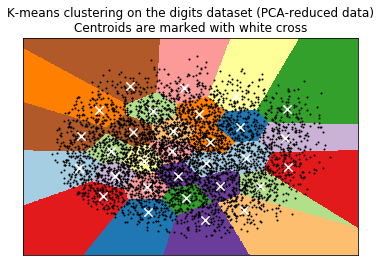

In [84]:
data = investor_embed_mat
num_clusters=30
num_components=2

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data)
kmeans.labels_

kmeans.cluster_centers_

reduced_data = PCA(n_components=num_components).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=69, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [34]:
# # define the model
# name = 'model_1'

# output_dim = len(selected_investors)

# companies_input = Input(shape=(maxlen,), dtype='int32')
# x = Embedding(vocab_size, 10, input_length=maxlen)(companies_input)
# x = AveragePooling1D(pool_size=(maxlen,))(x)
# x = Reshape((10,))(x)
# x = Dense(32)(x)
# output = Dense(output_dim, activation='softmax')(x)
# model = Model(companies_input, output)

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# print(model.summary())

# model_json = model.to_json()
# with open('results/{}.json'.format(name), 'w') as json_file:
#     json_file.write(model_json)

# checkpointer = ModelCheckpoint(
#     filepath='results/{}_weights.hdf5'.format(name), 
#     monitor='acc',
#     verbose=1, save_best_only=True)
# callbacks_list = [checkpointer]

# hist = model.fit(padded_portfolios, labels, epochs=500, verbose=0, callbacks=callbacks_list,
#         batch_size=64)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 47)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 47, 10)            12690     
_________________________________________________________________
average_pooling1d_5 (Average (None, 1, 10)             0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_10 (Dense)             (None, 255)               8415      
Total params: 21,457
Trainable params: 21,457
Non-trainable params: 0
_________________________________________________________________
None




Epoch 00122: acc improved from 0.13333 to 0.13333, saving model to results/model_1_weights.hdf5

Epoch 00123: acc improved from 0.13333 to 0.13725, saving model to results/model_1_weights.hdf5

Epoch 00124: acc improved from 0.13725 to 0.14118, saving model to results/model_1_weights.hdf5

Epoch 00125: acc did not improve from 0.14118

Epoch 00126: acc improved from 0.14118 to 0.14510, saving model to results/model_1_weights.hdf5

Epoch 00127: acc improved from 0.14510 to 0.15294, saving model to results/model_1_weights.hdf5

Epoch 00128: acc improved from 0.15294 to 0.16471, saving model to results/model_1_weights.hdf5

Epoch 00129: acc improved from 0.16471 to 0.16863, saving model to results/model_1_weights.hdf5

Epoch 00130: acc improved from 0.16863 to 0.16863, saving model to results/model_1_weights.hdf5

Epoch 00131: acc improved from 0.16863 to 0.17255, saving model to results/model_1_weights.hdf5

Epoch 00132: acc did not improve from 0.17255

Epoch 00133: acc did not improve


Epoch 00230: acc did not improve from 0.55294

Epoch 00231: acc improved from 0.55294 to 0.55686, saving model to results/model_1_weights.hdf5

Epoch 00232: acc improved from 0.55686 to 0.56078, saving model to results/model_1_weights.hdf5

Epoch 00233: acc improved from 0.56078 to 0.57647, saving model to results/model_1_weights.hdf5

Epoch 00234: acc did not improve from 0.57647

Epoch 00235: acc did not improve from 0.57647

Epoch 00236: acc improved from 0.57647 to 0.58039, saving model to results/model_1_weights.hdf5

Epoch 00237: acc improved from 0.58039 to 0.58039, saving model to results/model_1_weights.hdf5

Epoch 00238: acc improved from 0.58039 to 0.58431, saving model to results/model_1_weights.hdf5

Epoch 00239: acc did not improve from 0.58431

Epoch 00240: acc improved from 0.58431 to 0.60784, saving model to results/model_1_weights.hdf5

Epoch 00241: acc improved from 0.60784 to 0.61176, saving model to results/model_1_weights.hdf5

Epoch 00242: acc did not improve fr


Epoch 00348: acc did not improve from 0.96078

Epoch 00349: acc did not improve from 0.96078

Epoch 00350: acc did not improve from 0.96078

Epoch 00351: acc did not improve from 0.96078

Epoch 00352: acc did not improve from 0.96078

Epoch 00353: acc improved from 0.96078 to 0.96863, saving model to results/model_1_weights.hdf5

Epoch 00354: acc did not improve from 0.96863

Epoch 00355: acc did not improve from 0.96863

Epoch 00356: acc did not improve from 0.96863

Epoch 00357: acc improved from 0.96863 to 0.97255, saving model to results/model_1_weights.hdf5

Epoch 00358: acc did not improve from 0.97255

Epoch 00359: acc did not improve from 0.97255

Epoch 00360: acc did not improve from 0.97255

Epoch 00361: acc did not improve from 0.97255

Epoch 00362: acc did not improve from 0.97255

Epoch 00363: acc did not improve from 0.97255

Epoch 00364: acc did not improve from 0.97255

Epoch 00365: acc improved from 0.97255 to 0.97647, saving model to results/model_1_weights.hdf5

Epo

In [86]:
investor_embed_mat = model.layers[5].get_weights()[0]
investor_embed_mat = investor_embed_mat.transpose()
norm_investor_embed_mat = investor_embed_mat / np.linalg.norm(investor_embed_mat, axis=1, keepdims=True)

def get_investor_embedding(name):
    return norm_investor_embed_mat[selected_investors_id_dict[name]]

In [87]:
np.shape(norm_investor_embed_mat)

(4572, 32)

In [88]:
probe_name = 'Y Combinator'
embed_probe = get_investor_embedding(probe_name)

In [89]:
similarity_scores = norm_investor_embed_mat.dot(embed_probe)

closest_ids = np.argpartition(similarity_scores, -3)[-3:]

closest_ids = closest_ids[np.argsort(similarity_scores[closest_ids])][::-1]

print(closest_ids)

for i in closest_ids:
    print('=' * 50)
    investor_name = selected_companies_id_dict_inverse[i]
    print(investor_name, similarity_scores[i])
    print(selected_investor_company_dict[investor_name])

[4466 1773 1099]
Body Labs 1.0000002


KeyError: 'Body Labs'

In [124]:
type(investor_embed_mat)

numpy.ndarray